In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

from sklearn.metrics import roc_auc_score, roc_curve, auc

import rnn

In [9]:
def flexroc(fname):
    
    """
    
    """
    
    FLEXROC = '/home/yhuang10/Spatio-Temporal/cynet_/bin/flexroc '
    
    RES = {}
    
    h = np.array(fname.split('/')[-1].split('_')[0].split('#')).astype(float)
    RES['lat1'], RES['lat2'], RES['lon1'], RES['lon2'] = h 
    df = pd.read_csv(fname)

    df[['AR_grt','AR_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')

    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['VAR'] = float(result[0].split()[1])
    
    df[['AS_grt','AS_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['HOMICIDE-ASSAULT-BATTERY'] = float(result[0].split()[1])
    
    df[['PR_grt','PR_prd']].to_csv('tmp.csv',header=None,index=None,sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    RES['BURGLARY-THEFT-MOTOR_VEHICLE_THEFT'] = float(result[0].split()[1])
    
    ! rm tmp.csv
    
    return RES

RES = flexroc('./results/random_100-10_100/41.73216#41.73492#-87.55528000000002#-87.55176_1.rnnres') 
RES

{'BURGLARY-THEFT-MOTOR_VEHICLE_THEFT': 0.776865,
 'HOMICIDE-ASSAULT-BATTERY': 0.802543,
 'VAR': 0.775808,
 'lat1': 41.73216,
 'lat2': 41.73492,
 'lon1': -87.55528000000002,
 'lon2': -87.55176}

In [2]:
meta = pd.read_csv('../data/meta.csv', index_col=0)
X_raw = np.genfromtxt('../data/CRIME-_2014-01-01_2016-12-31.csv')

In [3]:
cynetTop = [
    '41.8828#-87.7435', '41.7584#-87.6555', 
    '41.8828#-87.6274', '41.7750#-87.6520', 
    '41.9104#-87.7048', '41.7446#-87.6520',
    '41.9270#-87.7364', '41.7833#-87.5957', 
    '41.9823#-87.6555', '41.8275#-87.6168'
]

## An example

In [4]:
center = cynetTop[0]
tile = meta.loc[center, ['lat1', 'lat2','lon1', 'lon2']]
    
future = 3
    
X_train, Y_train, X_test, Y_test = rnn.getData(meta, X_raw, center, future)

model = rnn.train_3(X_train, Y_train, epochs=100)
prediction = model.predict(X_test)

Arrest: 1293,
Property: 3632,
Assault: 5673.
Training data: input dim = (1, 727, 6165), output dim = (1, 727, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 500)         13332000  
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 100)         240400    
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 10)          4440      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/100
1/1 [=======================

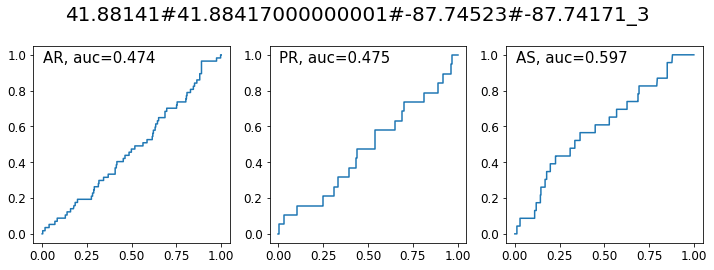

In [5]:
figTitle = '#'.join(map(str, tile.values)) + '_{}'.format(future)
dfName = figTitle + '.rnnres'
rnn.Analysis(Y_test, prediction, figTitle, dfName)

## Top 10 comparison:
Test the performance of (deep) RNN with horizon=$7$ on the ten blocks
on which cynet got the higest average AUC scores for the 3 variables.

Arrest: 1293,
Property: 3632,
Assault: 5673.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_15 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [=====================

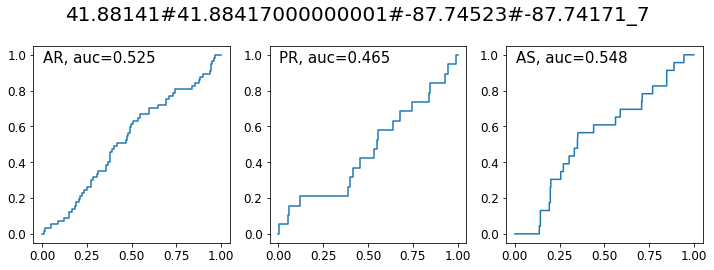

Arrest: 356,
Property: 2695,
Assault: 4947.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_17 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_18 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [======================

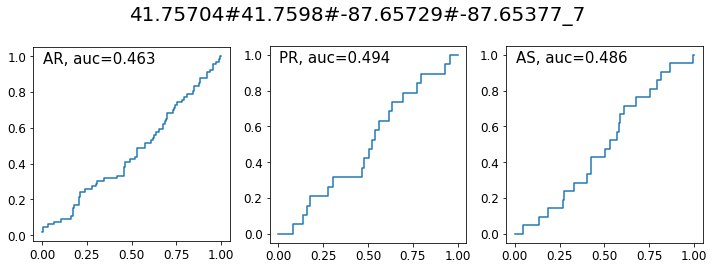

Arrest: 1322,
Property: 3661,
Assault: 5692.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_21 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [=====================

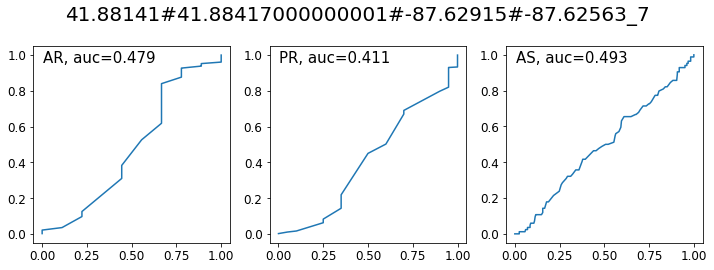

Arrest: 549,
Property: 2888,
Assault: 5125.
Training data: input dim = (1, 723, 6165), output dim = (1, 723, 3)
Out-sample data: input dim = (1, 366, 6165), output dim = (1, 366, 3)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, None, 500)         13332000  
_________________________________________________________________
lstm_23 (LSTM)               (None, None, 100)         240400    
_________________________________________________________________
lstm_24 (LSTM)               (None, None, 10)          4440      
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 3)           33        
Total params: 13,576,873
Trainable params: 13,576,873
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/200
1/1 [======================

In [ ]:
future = 7
RES = []
for center in cynetTop:
    tile = meta.loc[center, ['lat1', 'lat2','lon1', 'lon2']]

    X_train, Y_train, X_test, Y_test = rnn.getData(meta, X_raw, center, future)

    model = rnn.train_3(X_train, Y_train, epochs=200)
    prediction = model.predict(X_test)
    
    figTitle = '#'.join(map(str, tile.values)) + '_{}'.format(future)
    dfName = 'results/top10_deeper/' + figTitle + '.rnnres'
    rnn.Analysis(Y_test, prediction, figTitle, dfName)
    rnnres = flexroc(dfName)
    RES.append(rnnres)

In [39]:
cynet = pd.read_csv('../data/cynet_performance.csv').round(4)
rnn = pd.DataFrame(data=RES)
rnn = rnn.set_index(['lat1','lat2','lon1','lon2']).stack().reset_index().rename(columns={'level_4':'var',0:'auc_NN'}).round(4)
df = cynet.set_index(['lat1','lat2','lon1','lon2','var']).join(rnn.set_index(['lat1','lat2','lon1','lon2','var'])).reset_index().dropna()
df

,lat1,lat2,lon1,lon2,var,auc,auc_NN
963,41.7570,41.7598,-87.6573,-87.6538,BURGLARY-THEFT-MOTOR_VEHICLE_THEFT,0.9524,0.7106
964,41.7570,41.7598,-87.6573,-87.6538,HOMICIDE-ASSAULT-BATTERY,0.9898,0.8480
965,41.7570,41.7598,-87.6573,-87.6538,VAR,0.8767,0.7228
3524,41.8814,41.8842,-87.7452,-87.7417,BURGLARY-THEFT-MOTOR_VEHICLE_THEFT,0.9553,0.7827
3525,41.8814,41.8842,-87.7452,-87.7417,HOMICIDE-ASSAULT-BATTERY,0.9694,0.7642
3526,41.8814,41.8842,-87.7452,-87.7417,VAR,0.8968,0.7718


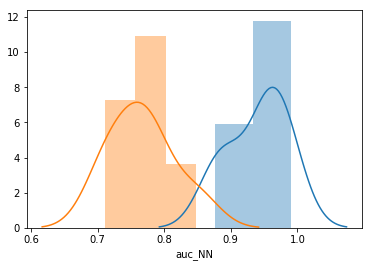

In [43]:
sns.distplot(df.auc)
sns.distplot(df.auc_NN)
plt.show()

## Average Performance:
Test the performance of (deep) RNN with horizon=$7$ on the $50$ blocks.

In [ ]:
random = [ 
    298, 304, 908, 1176, 453,  
    281, 947, 203, 1443, 159,  
    870, 109, 103, 1206, 1084, 
    615, 1013, 324, 470, 901,
    1025, 260, 1106, 551, 82, 
    903, 1137, 1477, 210, 388,
    824, 270,  595, 269, 454,
    291, 637, 930, 292, 360,
    832, 29, 320, 498, 1181, 
    1352, 732, 1164, 488, 1124
]